# Exercise No. 16 
## Titanic Dataset with Bayesian Statistics
#### 2019 June 25 | Cameron.Cn

In [80]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB   #import Gaussian Bayes modeling function
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

---
### Data

In [2]:
loc = './Module_0/datasets/titanic.xls'

df = pd.read_excel(loc)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [4]:
missing_age = df.loc[df['age'].isnull()]
missing_age.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [5]:
mal = list(missing_age.index)

In [6]:
df.groupby(['survived','sex','pclass'])['age'].mean()

survived  sex     pclass
0         female  1         35.200000
                  2         34.090909
                  3         23.418750
          male    1         43.658163
                  2         33.092593
                  3         26.679598
1         female  1         37.109375
                  2         26.711051
                  3         20.814815
          male    1         36.168240
                  2         17.449274
                  3         22.436441
Name: age, dtype: float64

---
### Cleaning

In [7]:
df['age'].fillna(df.groupby(['survived','sex','pclass'])['age'].transform('mean'), inplace=True)

In [8]:
df.iloc[mal].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,43.658163,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,36.168240,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,43.658163,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,43.658163,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,37.109375,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [9]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [10]:
embark = df.loc[df['embarked'].isnull()]
embark

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,6,NaN,"Cincinatti, OH"


In [11]:
embarkls = list(embark.index)

In [12]:
df['embarked'].fillna('S', inplace=True)

In [13]:
df.iloc[embarkls]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
168,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S,6,NaN,NaN
284,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S,6,NaN,"Cincinatti, OH"


In [14]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [15]:
modeldf = df.drop(['name','ticket','fare','cabin','boat','body','home.dest'], axis=1)
modeldf.head()

,pclass,survived,sex,age,sibsp,parch,embarked
0,1,1,female,29.0000,0,0,S
1,1,1,male,0.9167,1,2,S
2,1,0,female,2.0000,1,2,S
3,1,0,male,30.0000,1,2,S
4,1,0,female,25.0000,1,2,S


In [16]:
modeldf = pd.get_dummies(data=modeldf, columns=['pclass','embarked'])
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,1,female,29.0000,0,0,1,0,0,0,0,1
1,1,male,0.9167,1,2,1,0,0,0,0,1
2,0,female,2.0000,1,2,1,0,0,0,0,1
3,0,male,30.0000,1,2,1,0,0,0,0,1
4,0,female,25.0000,1,2,1,0,0,0,0,1


In [17]:
modeldf['sex'] = modeldf['sex'].map({'female':0, 'male':1})
modeldf.head()

,survived,sex,age,sibsp,parch,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S
0,1,0,29.0000,0,0,1,0,0,0,0,1
1,1,1,0.9167,1,2,1,0,0,0,0,1
2,0,0,2.0000,1,2,1,0,0,0,0,1
3,0,1,30.0000,1,2,1,0,0,0,0,1
4,0,0,25.0000,1,2,1,0,0,0,0,1


In [18]:
modeldf['familyNum'] = modeldf['sibsp'] + modeldf['parch']
modeldf.drop(['sibsp','parch'],axis=1, inplace=True)
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,familyNum
0,1,0,29.0000,1,0,0,0,0,1,0
1,1,1,0.9167,1,0,0,0,0,1,3
2,0,0,2.0000,1,0,0,0,0,1,3
3,0,1,30.0000,1,0,0,0,0,1,3
4,0,0,25.0000,1,0,0,0,0,1,3


In [19]:
modeldf['TravelAlone'] = np.where((modeldf['familyNum'] > 0), 0, 1)
# if someone is alone, '1', if they had family, '0'
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,familyNum,TravelAlone
0,1,0,29.0000,1,0,0,0,0,1,0,1
1,1,1,0.9167,1,0,0,0,0,1,3,0
2,0,0,2.0000,1,0,0,0,0,1,3,0
3,0,1,30.0000,1,0,0,0,0,1,3,0
4,0,0,25.0000,1,0,0,0,0,1,3,0


---
### Modelling

In [44]:
print(modeldf.count())
print('--------')
print(modeldf.dtypes)

survived       1309
sex            1309
age            1309
pclass_1       1309
pclass_2       1309
pclass_3       1309
embarked_C     1309
embarked_Q     1309
embarked_S     1309
familyNum      1309
TravelAlone    1309
dtype: int64
--------
survived         int64
sex              int64
age            float64
pclass_1         uint8
pclass_2         uint8
pclass_3         uint8
embarked_C       uint8
embarked_Q       uint8
embarked_S       uint8
familyNum        int64
TravelAlone      int32
dtype: object


In [45]:
modeldf.corr()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,familyNum,TravelAlone
survived,1.000000,-0.528693,-0.060032,0.279449,0.050790,-0.283428,0.182123,-0.016071,-0.150542,0.026876,-0.201719
sex,-0.528693,1.000000,0.080752,-0.107371,-0.028862,0.116562,-0.066564,-0.088651,0.115193,-0.188583,0.284537
age,-0.060032,0.080752,1.000000,0.428501,0.005843,-0.375549,0.082706,-0.085716,-0.018446,-0.206087,0.116266
pclass_1,0.279449,-0.107371,0.428501,1.000000,-0.296526,-0.622172,0.325722,-0.166101,-0.181800,-0.029656,-0.126551
pclass_2,0.050790,-0.028862,0.005843,-0.296526,1.000000,-0.563180,-0.134675,-0.121973,0.196532,-0.039976,-0.035075
pclass_3,-0.283428,0.116562,-0.375549,-0.622172,-0.563180,1.000000,-0.171430,0.243706,-0.003805,0.058430,0.138250
embarked_C,0.182123,-0.066564,0.082706,0.325722,-0.134675,-0.171430,1.000000,-0.164166,-0.778262,-0.036553,-0.107874
embarked_Q,-0.016071,-0.088651,-0.085716,-0.166101,-0.121973,0.243706,-0.164166,1.000000,-0.491656,-0.087190,0.127214
embarked_S,-0.150542,0.115193,-0.018446,-0.181800,0.196532,-0.003805,-0.778262,-0.491656,1.000000,0.087771,0.014246
familyNum,0.026876,-0.188583,-0.206087,-0.029656,-0.039976,0.058430,-0.036553,-0.087190,0.087771,1.000000,-0.688864


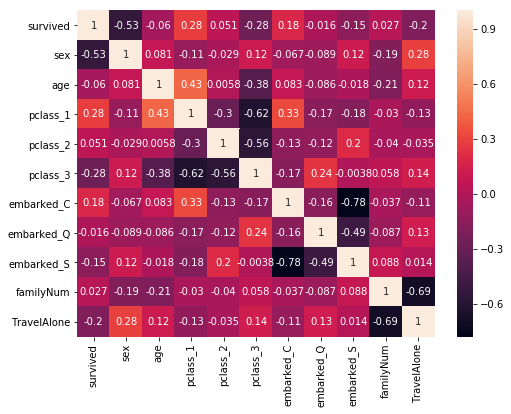

In [64]:
plt.subplots(figsize=(8,6))
sns.heatmap(modeldf.corr(), annot=True)

In [65]:
modeldf.head()

,survived,sex,age,pclass_1,pclass_2,pclass_3,embarked_C,embarked_Q,embarked_S,familyNum,TravelAlone
0,1,0,29.0000,1,0,0,0,0,1,0,1
1,1,1,0.9167,1,0,0,0,0,1,3,0
2,0,0,2.0000,1,0,0,0,0,1,3,0
3,0,1,30.0000,1,0,0,0,0,1,3,0
4,0,0,25.0000,1,0,0,0,0,1,3,0


In [67]:
# creating our variables for the training data
X = modeldf.drop('survived', axis=1)
Y = modeldf['survived']

In [87]:
# the syntax for this is ALWAYS THE SAME
# X (Train, Test); Y (Train, Test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=129)

---
### Gaussian NB

In [88]:
gnb = GaussianNB() # to more easily call our Gaussian function

In [89]:
gnb.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [90]:
gnb.score(X_train, Y_train)
# only ~78% accurate! Not much better than a moderately educated guess

0.781855249745158

In [91]:
Y_pred = gnb.predict(X_test)

In [92]:
confMat = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred),
    columns = ['Predicted Non-Survival','Predicted Survived'],
    index = ['True Non-Survival','True Survived']
)
confMat

,Predicted Non-Survival,Predicted Survived
True Non-Survival,168,55
True Survived,26,79


In [93]:
Y_test.value_counts()

0    223
1    105
Name: survived, dtype: int64

In [94]:
gnb.score(X_test,Y_test)

0.7530487804878049

In [95]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       223
           1       0.59      0.75      0.66       105

   micro avg       0.75      0.75      0.75       328
   macro avg       0.73      0.75      0.73       328
weighted avg       0.78      0.75      0.76       328



---
### BernoulliNB


In [96]:
bnb = BernoulliNB()

In [97]:
bnb.fit(X_train, Y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [98]:
bnb.score(X_train, Y_train)

0.7604485219164119

In [99]:
Y_pred2 = bnb.predict(X_test)

In [100]:
confMat2 = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred2),
    columns = ['Predicted Non-Survival','Predicted Survived'],
    index = ['True Non-Survival','True Survived']
)
confMat2

,Predicted Non-Survival,Predicted Survived
True Non-Survival,173,50
True Survived,37,68


In [101]:
bnb.score(X_test,Y_test)

0.7347560975609756

---
### Rundown


The two methods weren't super accurate, and neither broke 80% accurate on test data.


|[]|Bernoulli | Gaussian |
| --- | --- | --- |
| Train | 76% | 78% | 
| Test | 73% | 75% |

